# Importing libraries and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_combined = pd.concat([df_train, df_test])

# Exploratory Data Analysis

In [6]:
df_combined.head()

,'ID,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,...,Gender,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1
0,APPC90493171225,0.0,A,C10001,N,B001,23/07/79,NaN,A,4.0,...,Female,NaN,15/07/16,NaN,NaN,2000.0,P,S122,G,0
1,APPD40611263344,0.0,A,C10003,Y,B002,07/12/86,953.0,C,1.0,...,Male,13.25,04/07/16,20000.0,2.0,3500.0,P,S122,G,10
2,APPE70289249423,0.0,C,C10125,Y,B003,10/12/82,NaN,C,4.0,...,Male,NaN,19/07/16,45000.0,4.0,2250.0,G,S143,B,0
3,APPF80273865537,0.0,C,C10477,Y,B003,30/01/89,NaN,A,4.0,...,Male,NaN,09/07/16,92000.0,5.0,3500.0,G,S143,B,7
4,APPG60994436641,0.0,A,C10002,Y,B001,19/04/85,NaN,A,4.0,...,Male,NaN,20/07/16,50000.0,2.0,10000.0,P,S134,B,10


In [7]:
df_combined.describe(include='all')

,'ID,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,...,Gender,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1
count,99750,69713.000000,98622,98622,99750,86322,99732,31928.000000,94127,93757.000000,...,99750,31928.000000,99750,60170.000000,60170.000000,9.975000e+04,86322,99750,99750,99750.000000
unique,99750,NaN,3,704,2,57,11672,NaN,3,NaN,...,2,NaN,92,NaN,NaN,NaN,2,33,7,NaN
top,APPJ70738096145,NaN,A,C10001,Y,B001,11/01/82,NaN,A,NaN,...,Male,NaN,02/09/16,NaN,NaN,NaN,P,S122,B,NaN
freq,1,NaN,71383,14313,64772,20155,345,NaN,47805,NaN,...,57153,NaN,2614,NaN,NaN,NaN,56483,44213,42743,NaN
mean,NaN,0.014631,NaN,NaN,NaN,NaN,NaN,1099.485718,NaN,3.722623,...,NaN,19.233814,NaN,39445.986372,3.894399,5.126893e+03,NaN,NaN,NaN,3.952622
std,NaN,0.120073,NaN,NaN,NaN,NaN,NaN,745.125218,NaN,0.803623,...,NaN,5.857761,NaN,30667.188339,1.162487,1.466628e+05,NaN,NaN,NaN,3.819744
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,118.000000,NaN,1.000000,...,NaN,11.990000,NaN,5000.000000,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,642.750000,NaN,4.000000,...,NaN,15.250000,NaN,20000.000000,3.000000,1.650000e+03,NaN,NaN,NaN,0.000000
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,943.000000,NaN,4.000000,...,NaN,18.000000,NaN,30000.000000,4.000000,2.500000e+03,NaN,NaN,NaN,2.000000
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1293.000000,NaN,4.000000,...,NaN,20.000000,NaN,50000.000000,5.000000,4.000000e+03,NaN,NaN,NaN,7.000000


### Correlation Check

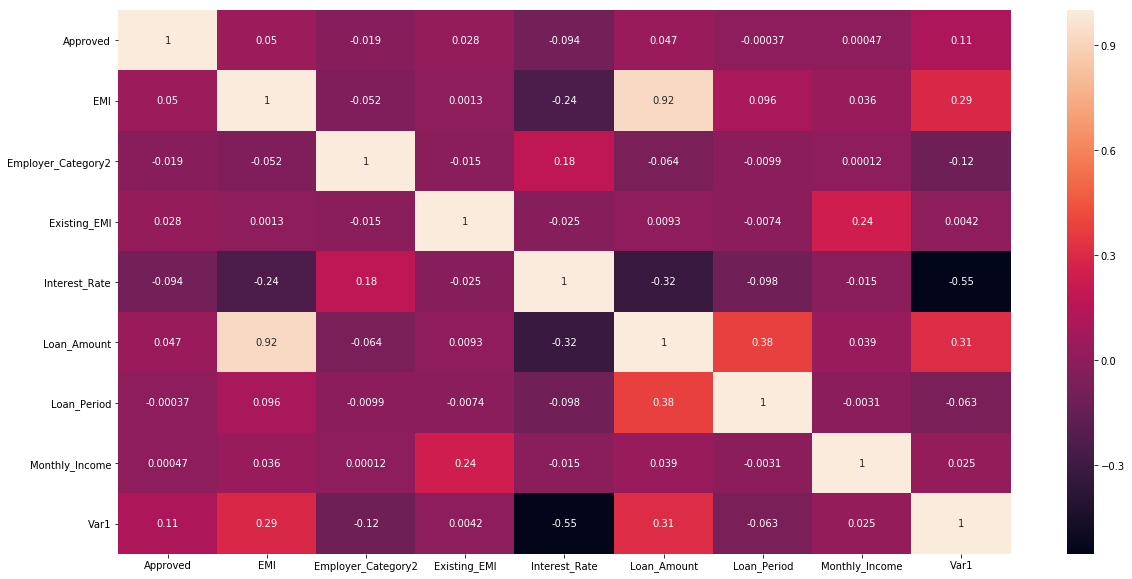

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df_combined.corr(), annot=True)
plt.show()

### Checking null value percentage in each column

In [9]:
(np.sum(df_combined.isnull())/df_combined.shape[0]).sort_values(ascending=True)*100

'ID                                     0.000000
Source                                  0.000000
Monthly_Income                          0.000000
Lead_Creation_Date                      0.000000
Gender                                  0.000000
Source_Category                         0.000000
Var1                                    0.000000
Contacted                               0.000000
DOB                                     0.018045
Existing_EMI                            0.083208
City_Code                               1.130827
City_Category                           1.130827
Employer_Category1                      5.637093
Employer_Code                           5.637093
Employer_Category2                      6.008020
Customer_Existing_Primary_Bank_Code    13.461654
Primary_Bank_Type                      13.461654
Approved                               30.112281
Loan_Amount                            39.679198
Loan_Period                            39.679198
EMI                 

In [11]:
# Relationship between City Category and City Code
print (np.sum(df_combined.isnull()).loc['City_Category'] == df_combined[df_combined.City_Category.isnull() & df_combined.City_Code.isnull()].shape[0])

# Relationship between Employer Category1 and Employer Code
print (np.sum(df_combined.isnull()).loc['Employer_Code'] == df_combined[df_combined.Employer_Category1.isnull() & df_combined.Employer_Code.isnull()].shape[0])

# Relationship between Loan Amount and Loan_Period
print (np.sum(df_combined.isnull()).loc['Loan_Amount'] == df_combined[df_combined.Loan_Amount.isnull() & df_combined.Loan_Period.isnull()].shape[0])

# Relationship between Interest Rate and EMI
print (np.sum(df_combined.isnull()).loc['EMI'] == df_combined[df_combined.EMI.isnull() & df_combined.Interest_Rate.isnull()].shape[0])

# Relationship between Customer Existing Primary Bank Code and Primary Bank Type
print (np.sum(df_combined.isnull()).loc['Primary_Bank_Type'] == df_combined[df_combined.Customer_Existing_Primary_Bank_Code.isnull() & df_combined.Primary_Bank_Type.isnull()].shape[0])


True
True
True
True
True


In [12]:
# Group by source_category
df_combined.groupby('Source_Category').size()

Source_Category
A        6
B    42743
C    16274
D      717
E     1478
F      629
G    37903
dtype: int64

In [13]:
tab = df_combined.groupby('Source_Category').Approved.mean().sort_values()*100
print("percent of Approved=1, by", tab)
# conclusion: source_category D and A never converted into leads in our training set

percent of Approved=1, by Source_Category
A    0.000000
D    0.000000
C    1.230877
F    1.307190
G    1.372653
E    1.428571
B    1.660405
Name: Approved, dtype: float64


### Variable details

In [14]:
variable_details = pd.read_excel("Variable_details.xlsx")
print(variable_details.loc[:, ['Column', 'Type']])

                                 Column         Type
0                                    ID       Object
1                                Gender      Boolean
2                                   DOB         Date
3                    Lead_Creation_Date         Date
4                             City_Code  Categorical
5                         City_Category  Categorical
6                         Employer_Code  Categorical
7                    Employer_Category1  Categorical
8                    Employer_Category2  Categorical
9                        Monthly_Income    Numerical
10  Customer_Existing_Primary_Bank_Code  Categorical
11                    Primary_Bank_Type      Boolean
12                            Contacted      Boolean
13                               Source  Categorical
14                      Source_Category  Categorical
15                         Existing_EMI    Numerical
16                          Loan_Amount    Numerical
17                          Loan_Period    Num

### Feature Engineering

In [15]:
# infer datatype
def getcoltype(type):
    '''Input string of type. Output list of colnames with that type. 
    Types can be Numerical, Categorical, Boolean, Object
    '''
    return variable_details.loc[variable_details.Type == type, 'Column'].tolist()

# save to list based on datatype
cols_datetime = getcoltype('Date')
cols_numeric = getcoltype('Numerical')
cols_category = getcoltype('Categorical')
cols_object = getcoltype('Object')
cols_boolean = getcoltype('Boolean')

In [16]:
# convert categorical, numerical, datetime
df_combined[cols_numeric] = df_combined[cols_numeric].apply(lambda x: pd.to_numeric(x))
df_combined[cols_datetime] = df_combined[cols_datetime].apply(lambda x: pd.to_datetime(x))
df_combined[cols_category] = df_combined[cols_category].apply(lambda x: x.astype('category'))

In [17]:
# convert booleans
df_combined['Female'] = (df_combined.Gender == 'Female')
df_combined['Primary_Bank_Type_G'] = (df_combined.Primary_Bank_Type == 'G')
df_combined['Contacted'] = (df_combined.Contacted == 'Y')
df_combined.drop(['Gender', 'Primary_Bank_Type'], inplace = True, axis=1)
cols_boolean = ['Female', 'Primary_Bank_Type_G', 'Contacted']

### Feature Generation

In [18]:
# create age 
df_combined['age'] = 2018 - df_combined.DOB.dt.year
cols_numeric.append('age')

# fix age
df_combined.loc[df_combined.age < 0, 'age'] = np.nan

### Missing Data Imputation

In [19]:
# rows 
rows_train_csv = df_combined['Approved'].notnull()
rows_test_csv = ~rows_train_csv

In [20]:
# impute NA  for df_train and df_test

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_combined.loc[rows_train_csv, cols_numeric] = imp.fit_transform(df_combined.loc[rows_train_csv, cols_numeric])
df_combined.loc[rows_test_csv, cols_numeric] = imp.transform(df_combined.loc[rows_test_csv, cols_numeric])

### Data Scaling

In [21]:
# standardize for df_train and df_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_combined.loc[rows_train_csv, cols_numeric] = scaler.fit_transform(df_combined.loc[rows_train_csv, cols_numeric])
df_combined.loc[rows_test_csv, cols_numeric] = scaler.transform(df_combined.loc[rows_test_csv, cols_numeric])

In [22]:
df_combined.head()

,'ID,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,...,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Source,Source_Category,Var1,Female,Primary_Bank_Type_G,age
0,APPC90493171225,0.0,A,C10001,False,B001,1979-07-23,0.00000,A,4.0,...,2016-07-15,0.000000,0.000000,-0.020726,S122,G,0,True,False,1.255632
1,APPD40611263344,0.0,A,C10003,True,B002,1986-07-12,-0.34896,C,1.0,...,2016-04-07,-0.814630,-2.086266,-0.012144,S122,G,10,False,False,0.009396
2,APPE70289249423,0.0,C,C10125,True,B003,1982-10-12,0.00000,C,4.0,...,2016-07-19,0.233531,0.120688,-0.019296,S143,B,0,False,True,0.721531
3,APPF80273865537,0.0,C,C10477,True,B003,1989-01-30,0.00000,A,4.0,...,2016-09-07,2.204074,1.224165,-0.012144,S143,B,7,False,True,-0.524705
4,APPG60994436641,0.0,A,C10002,True,B001,1985-04-19,0.00000,A,4.0,...,2016-07-20,0.443163,-2.086266,0.025049,S134,B,10,False,False,0.187430


### Dependent & Independent Variable declaration

In [23]:
cols = ['Monthly_Income', 'Contacted',
          'Source_Category', 'Var1', 'Female', 'Primary_Bank_Type_G',
          'age', 'Employer_Category1', 'Employer_Category2'
         ]

In [24]:
cols_X = cols

In [25]:
X = pd.get_dummies(df_combined[cols_X], drop_first = True)

In [26]:
# X variables for df_train, df_test
Xm = X[rows_train_csv]
Xp = X[rows_test_csv]

# y variables for df_train, df_test and df_combined
ym = df_combined.loc[rows_train_csv, 'Approved']
yp = df_combined.loc[rows_test_csv, 'Approved']
y = df_combined['Approved']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.20, random_state=9)

### Model Selection

In [28]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

clfs = {'GradientBoosting': GradientBoostingClassifier(),
        'LogisticRegression' : LogisticRegression(),
        'GaussianNB': GaussianNB(),
        'RandomForest': RandomForestClassifier(),
        'SupportVectorMachine' : SVC(probability=True)
        }

In [29]:
cols = ['model', 'roc_auc_score', 'accuracy']

Computing GradientBoosting
Computing LogisticRegression
Computing GaussianNB
Computing RandomForest
Computing SupportVectorMachine


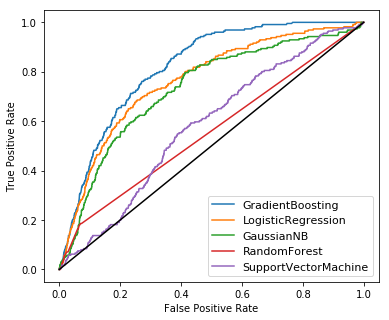

In [264]:
models_report = pd.DataFrame(columns = cols)
feature_importance = pd.DataFrame()

conf_matrix = dict()

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]

    print('Computing {}'.format(clf_name))
    
    if (clf_name == 'RandomForest') | (clf_name == 'GradientBoosting'):
        tmp_fi = pd.Series(clf.feature_importances_)
        feature_importance[clf_name] = tmp_fi
        

    tmp = pd.Series({ 
                     'model': clf_name,
                     'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                     'accuracy': metrics.accuracy_score(y_test, y_pred),
                    })

    models_report = models_report.append(tmp, ignore_index = True)

    conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

    plt.figure(1, figsize = (6,5))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label = clf_name)
    plt.legend(prop={'size':11})
plt.plot([0,1], [0,1], c = 'black')
plt.show()

In [265]:
models_report

,model,roc_auc_score,accuracy
0,GradientBoosting,0.817782,0.983719
1,LogisticRegression,0.763485,0.983791
2,GaussianNB,0.729368,0.213942
3,RandomForest,0.556781,0.980062
4,SupportVectorMachine,0.579362,0.983791


In [266]:
def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    #ax.set_colorbar()
    tick_marks = np.arange(len(classes))
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=35)

    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=35)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    #plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

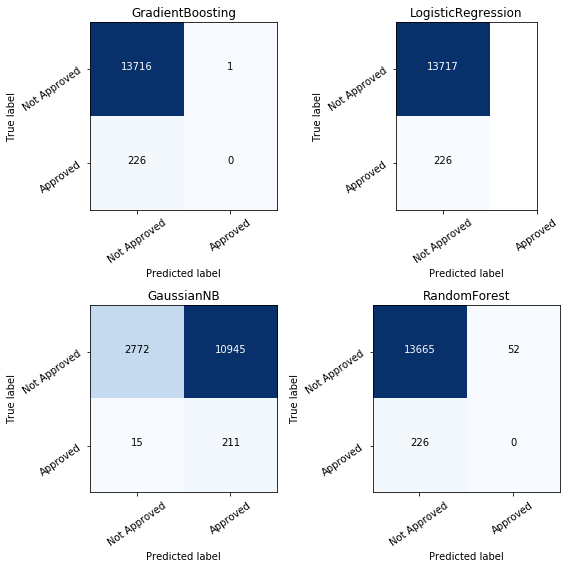

In [267]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

for c, ax in zip(conf_matrix.keys(), [ax1,ax2,ax3,ax4]):
    plot_confusion_matrix(conf_matrix[c].values, ax, title = c, classes=['Not Approved','Approved'])

plt.tight_layout()
plt.show()


### Feature Selection

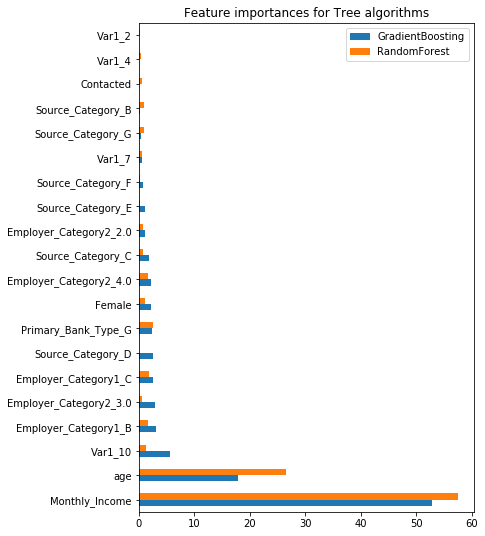

In [268]:
fi = feature_importance

fi.index = features
fi = fi.head(22) # Take the 22 most important metrics
fi = fi.sort_values('GradientBoosting', ascending=False)
fi = (fi / fi.sum(axis=0)) * 100
fi.plot.barh(title = 'Feature importances for Tree algorithms', figsize = (6,9))
plt.show()

# Model Fitting and Prediction

In [206]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score,f1_score 

clf = GradientBoostingClassifier() # good roc auc
clf


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [186]:
cv_scores = cross_val_score(clf,X_train, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [ 0.98565794  0.98512011  0.98565794  0.98565794  0.98565537  0.98547606
  0.98547346  0.98547346  0.98583214  0.98583214]
The mean accuracy score is 0.9855836563968143


In [187]:
clf.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [188]:
y_pred = clf.predict(X_test)

In [192]:
print(accuracy_score(y_test, y_pred))
print(log_loss(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.983719429104
0.562311055099
[[13716     1]
 [  226     0]]


In [193]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.81778214617737444

# Model Hyper-parameter Tuning

In [194]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[2,3,4],
               'min_samples_leaf':[1,10,20], 'learning_rate' : [0.05, 0.1, 0.2]}
grid_RF = GridSearchCV(clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, y_train)
grid_RF.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 50}

# Under-samling and improving model performance

In [30]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, stratify = ym, test_size=0.20, random_state=9)
pipe = make_pipeline(RandomUnderSampler(), GradientBoostingClassifier(learning_rate = 0.05,max_depth= 2,min_samples_leaf = 1,n_estimators= 50))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [208]:
print(accuracy_score(y_test, y_pred))
print(log_loss(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.64828229219
12.148178719
0.034284581847
0.848039215686
[[8866 4873]
 [  31  173]]


In [209]:
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.81242890925931488